In [1]:
# read the data from the csv files

import pandas as pd

In [2]:
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

In [9]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the preprocessed data
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'Appliances'], axis=1)
y = data['Appliances']

# Method 1: Correlation Analysis
correlation = data.corr()['Appliances'].abs().sort_values(ascending=False)
selected_features_corr = correlation[correlation > 0.1].index.tolist()

# Method 2: Univariate Feature Selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features_uni = X.columns[selector.get_support()].tolist()

# Compare the selected features
print("Features selected by correlation analysis:")
print(selected_features_corr)
print()
print("Features selected by univariate feature selection:")
print(selected_features_uni)


Features selected by correlation analysis:
['Appliances', 'lights', 'RH_out', 'T2', 'T6']

Features selected by univariate feature selection:
['lights', 'RH_1', 'T2', 'T3', 'T6', 'RH_6', 'RH_8', 'T_out', 'RH_out', 'Windspeed']


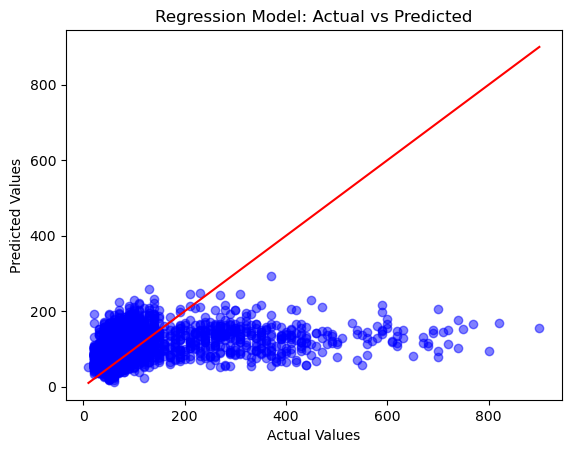

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the data from the CSV file
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'Appliances'], axis=1)
y = data['Appliances']

# Perform feature selection using correlation analysis
correlation = data.corr()['Appliances'].abs().sort_values(ascending=False)
selected_features_corr = correlation[correlation > 0.1].index.tolist()
selected_features_corr.remove('Appliances')

# Perform feature selection using univariate feature selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features_uni = X.columns[selector.get_support()].tolist()

# Combine selected features from both methods
selected_features = list(set(selected_features_corr + selected_features_uni))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Instantiate and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model: Actual vs Predicted')

# Add the regression line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')

plt.show()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Read the data from the CSV file
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'Appliances'], axis=1)
y = data['Appliances']

# Perform feature selection using correlation analysis
correlation = data.corr()['Appliances'].abs().sort_values(ascending=False)
selected_features_corr = correlation[correlation > 0.1].index.tolist()
selected_features_corr.remove('Appliances')

# Perform feature selection using univariate feature selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features_uni = X.columns[selector.get_support()].tolist()

# Combine selected features from both methods
selected_features = list(set(selected_features_corr + selected_features_uni))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Feature Engineering: Add additional features or transformations if desired
# Example: X_train['T2_squared'] = X_train['T2'] ** 2

# Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Hyperparameter Tuning
model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Visualize the regression model
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model: Actual vs Predicted')
plt.show()


KeyboardInterrupt: 

Mean Squared Error (MSE): 8761.316641856654


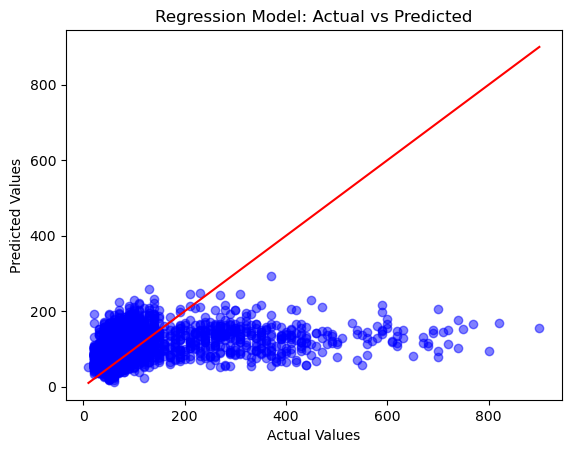

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the data from the CSV file
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'Appliances'], axis=1)
y = data['Appliances']

# Perform feature selection using correlation analysis
correlation = data.corr()['Appliances'].abs().sort_values(ascending=False)
selected_features_corr = correlation[correlation > 0.1].index.tolist()
selected_features_corr.remove('Appliances')

# Perform feature selection using univariate feature selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features_uni = X.columns[selector.get_support()].tolist()

# Combine selected features from both methods
selected_features = list(set(selected_features_corr + selected_features_uni))



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Visualize the regression model
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model: Actual vs Predicted')
plt.show()


Mean Squared Error (MSE): 7191.0099080166


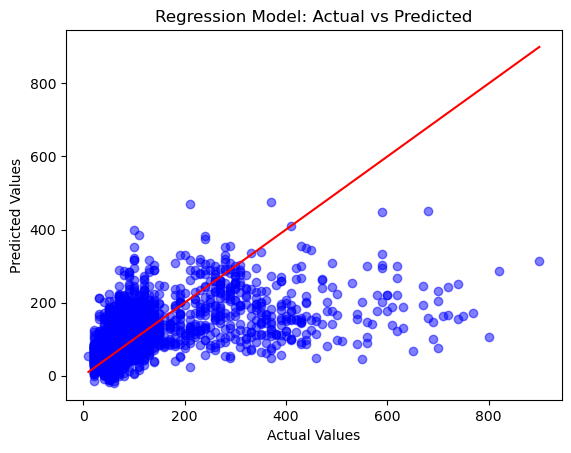

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the data from the CSV file
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'Appliances'], axis=1)
y = data['Appliances']

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Visualize the regression model
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model: Actual vs Predicted')
plt.show()


Mean Squared Error (MSE): 8541.433663527045


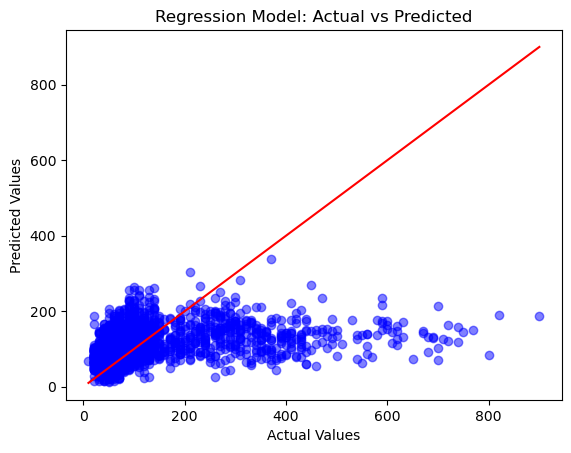

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the data from the CSV file
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'Appliances'], axis=1)
y = data['Appliances']

# Perform feature selection using correlation analysis
correlation = data.corr()['Appliances'].abs().sort_values(ascending=False)
selected_features_corr = correlation[correlation > 0.1].index.tolist()
selected_features_corr.remove('Appliances')

# Perform feature selection using univariate feature selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features_uni = X.columns[selector.get_support()].tolist()

# Combine selected features from both methods
selected_features = list(set(selected_features_corr + selected_features_uni))

# Add additional relevant features
# Example: Adding temperature difference between two rooms
X['T_diff_rooms'] = X['T2'] - X['T6']
selected_features.append('T_diff_rooms')

# Add two more features
X['T_out_diff'] = X['T_out'] - X['T9']
X['RH_out_diff'] = X['RH_out'] - X['RH_7']
selected_features.extend(['T_out_diff', 'RH_out_diff'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Visualize the regression model
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model: Actual vs Predicted')
plt.show()


Mean Squared Error (MSE): 5032.222847732454


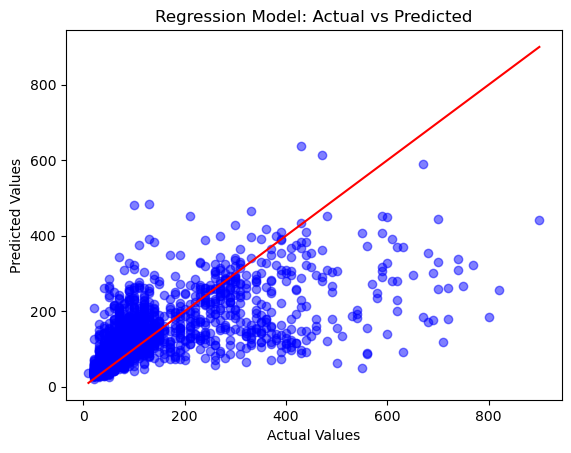

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Read the data from the CSV file
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'Appliances'], axis=1)
y = data['Appliances']

# Perform feature selection using correlation analysis
correlation = data.corr()['Appliances'].abs().sort_values(ascending=False)
selected_features_corr = correlation[correlation > 0.1].index.tolist()
selected_features_corr.remove('Appliances')

# Perform feature selection using univariate feature selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features_uni = X.columns[selector.get_support()].tolist()

# Combine selected features from both methods
selected_features = list(set(selected_features_corr + selected_features_uni))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Visualize the regression model
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model: Actual vs Predicted')
plt.show()


Mean Squared Error (MSE): 7861.753409868482


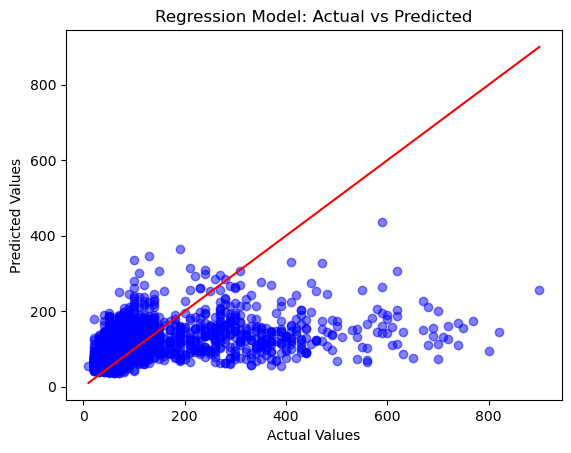

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Read the data from the CSV file
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'Appliances'], axis=1)
y = data['Appliances']

# Perform feature selection using correlation analysis
correlation = data.corr()['Appliances'].abs().sort_values(ascending=False)
selected_features_corr = correlation[correlation > 0.1].index.tolist()
selected_features_corr.remove('Appliances')

# Perform feature selection using univariate feature selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features_uni = X.columns[selector.get_support()].tolist()

# Combine selected features from both methods
selected_features = list(set(selected_features_corr + selected_features_uni))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Visualize the regression model
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model: Actual vs Predicted')
plt.show()


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Read the data from the CSV file
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'Appliances'], axis=1)
y = data['Appliances']

# Perform feature selection using correlation analysis
correlation = data.corr()['Appliances'].abs().sort_values(ascending=False)
selected_features_corr = correlation[correlation > 0.1].index.tolist()
selected_features_corr.remove('Appliances')

# Perform feature selection using univariate feature selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features_uni = X.columns[selector.get_support()].tolist()

# Combine selected features from both methods
selected_features = list(set(selected_features_corr + selected_features_uni))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training (SVR)
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Sort the test data for plotting
sort_indices = np.argsort(y_test)

# Visualize the regression model
plt.scatter(y_test.iloc[sort_indices], y_pred[sort_indices], color='b', alpha=0.5)
plt.plot(y_test.iloc[sort_indices], y_test.iloc[sort_indices], color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model: Actual vs Predicted')
plt.show()


In [11]:
import pandas as pd

# Read the data from the CSV file
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

# Print the column names
print(data.columns)


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the data from the CSV file
path = "data\\energydata_complete.csv"
data = pd.read_csv(path)

# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'Appliances'], axis=1)
y = data['Appliances']

# Perform feature selection using correlation analysis
correlation = data.corr()['Appliances'].abs().sort_values(ascending=False)
selected_features_corr = correlation[correlation > 0.1].index.tolist()

# Perform feature selection using univariate feature selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features_uni = X.columns[selector.get_support()].tolist()

# Combine selected features from both methods
selected_features = list(set(selected_features_corr + selected_features_uni))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Instantiate and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


KeyError: "['Appliances'] not in index"

In [5]:
import seaborn as sns

First few rows of the data:
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   R

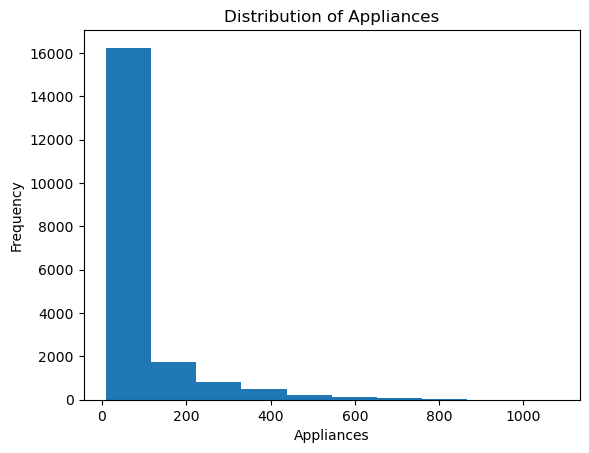

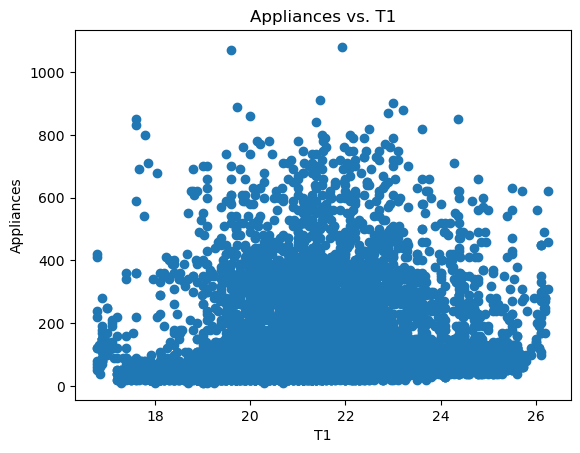

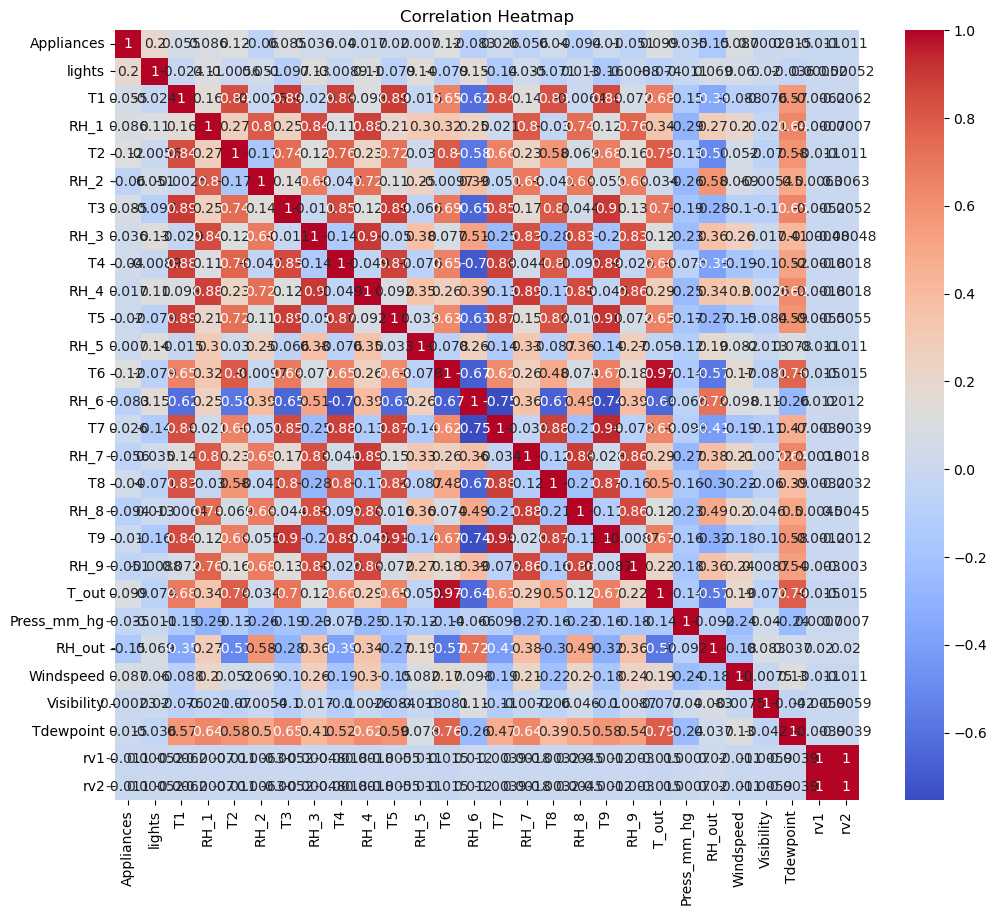

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
path = "data/energydata_complete.csv"
data = pd.read_csv(path)

# Display the first few rows of the DataFrame
print("First few rows of the data:")
print(data.head())

# Check the shape of the data
print("Data shape:")
print(data.shape)

# Check the data types of the columns
print("Data types:")
print(data.dtypes)

# Check summary statistics of numerical columns
print("Summary statistics:")
print(data.describe())

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Check for outliers (assuming numerical columns)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Outliers:")
for column in numerical_columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Column: {column}, Number of outliers: {len(outliers)}")

# Visualize distributions or relationships (using appropriate plots)
# Example:

# Histogram of the Appliances column
plt.hist(data['Appliances'])
plt.xlabel('Appliances')
plt.ylabel('Frequency')
plt.title('Distribution of Appliances')
plt.show()

# Scatter plot of Appliances vs. T1
plt.scatter(data['T1'], data['Appliances'])
plt.xlabel('T1')
plt.ylabel('Appliances')
plt.title('Appliances vs. T1')
plt.show()

# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
path = "data/energydata_complete.csv"
data = pd.read_csv(path)

# Drop unnecessary columns (if any)
data = data.drop(columns=['date'])

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Appliances'])
y = data['Appliances']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Additional preprocessing steps (if needed)
# e.g., handling missing values, outlier removal, encoding categorical variables

# Print the preprocessed data
print("Preprocessed X_train:")
print(X_train_scaled.shape)
print("Preprocessed X_test:")
print(X_test_scaled.shape)
print("y_train:")
print(y_train.shape)
print("y_test:")
print(y_test.shape)


Preprocessed X_train:
(15788, 27)
Preprocessed X_test:
(3947, 27)
y_train:
(15788,)
y_test:
(3947,)


In [17]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

# Load the preprocessed data
# Assume X_train_scaled and y_train are preprocessed training data

# Create an instance of SelectKBest with f_regression as the scoring function
selector = SelectKBest(score_func=f_regression, k=10)

# Fit the selector to the training data
selector.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['lights', 'RH_1', 'T2', 'T3', 'T6', 'RH_6', 'RH_8', 'T_out', 'RH_out',
       'Windspeed'],
      dtype='object')


In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the preprocessed data
# Assume X_train_scaled, y_train, X_test_scaled, y_test are preprocessed data
# with the selected features

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled.loc[:, selected_features], y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled.loc[:, selected_features])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the preprocessed data
# Assume X_train_scaled, y_train, X_test_scaled, y_test are preprocessed data
# with the selected features

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled.loc[:, selected_features], y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled.loc[:, selected_features])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


AttributeError: 'numpy.ndarray' object has no attribute 'loc'